In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('cloud-data/bus_data_modified.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,stop
0,4855,4131,Transit Bus,212.735226,LX Route,02:23 PM,-74.433571,40.519749,0,67,101,402213,111417,2024-10-31 18:24:00,0.000000,Quads
1,4859,4177,Transit Bus,128.232575,LX Route,02:23 PM,-74.436304,40.524327,27,67,102,402325,111417,2024-10-31 18:24:00,0.402985,Livingston Student Center
2,4873,4191,Transit Bus,240.802514,B Route,02:23 PM,-74.457712,40.523463,8,67,101,402329,113278,2024-10-31 18:24:00,0.119403,NaN
3,4876,4194,Transit Bus,299.246496,B Route,02:23 PM,-74.438946,40.521624,4,67,102,402330,113250,2024-10-31 18:24:00,0.059701,NaN
4,17624,4002,Heavy Duty Transit LF,226.694476,REXB Route,02:23 PM,-74.438830,40.483538,2,68,102,402643,112511,2024-10-31 18:24:00,0.029412,NaN


In [2]:
from random import choice

one_bus = int(choice(data['name'].unique()))
one_bus_data = data[data['name'] == one_bus]
one_bus_data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,stop
22,7151,202,Transit Bus,46.226452,REXL Route,02:23 PM,-74.438361,40.488622,4,75,102,405404,111680,2024-10-31 18:24:00,0.053333,NaN
70,7151,202,Transit Bus,21.161260,REXL Route,02:24 PM,-74.437463,40.489424,4,75,101,405404,111680,2024-10-31 18:24:31,0.053333,NaN
118,7151,202,Transit Bus,43.331663,REXL Route,02:24 PM,-74.437402,40.490133,4,75,102,405404,111680,2024-10-31 18:25:01,0.053333,NaN
165,7151,202,Transit Bus,346.220699,REXL Route,02:25 PM,-74.439545,40.495917,4,75,102,405404,111680,2024-10-31 18:25:32,0.053333,NaN
212,7151,202,Transit Bus,312.633884,REXL Route,02:26 PM,-74.443288,40.501372,4,75,102,405404,111680,2024-10-31 18:26:02,0.053333,NaN


In [3]:
one_bus_data['routeName'].unique()

array(['REXL Route', 'LX Route', 'EE Route'], dtype=object)

In [4]:
one_bus_data.describe()

,id,name,calculatedCourse,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
count,7882.0,7882.0,7882.000000,7882.000000,7882.000000,7882.000000,7882.0,7882.000000,7882.0,7882.000000,7882,7882.000000
mean,7151.0,202.0,184.379876,-74.442008,40.496048,23.805633,75.0,101.519792,405404.0,111675.760340,2024-11-04 21:43:35.682948608,0.317408
min,7151.0,202.0,0.283640,-74.459133,40.478889,0.000000,75.0,22.000000,405404.0,111431.000000,2024-10-31 18:24:00,0.000000
25%,7151.0,202.0,106.138295,-74.448187,40.484299,11.000000,75.0,101.000000,405404.0,111565.000000,2024-11-01 22:21:09.750000128,0.146667
50%,7151.0,202.0,165.469958,-74.440370,40.492587,19.000000,75.0,102.000000,405404.0,111571.000000,2024-11-05 15:48:49,0.253333
75%,7151.0,202.0,283.985776,-74.437331,40.503569,34.000000,75.0,102.000000,405404.0,111578.000000,2024-11-06 19:35:12.750000128,0.453333
max,7151.0,202.0,359.777853,-74.428627,40.526528,75.000000,75.0,102.000000,405404.0,112725.000000,2024-11-07 21:51:49,1.000000
std,0.0,0.0,98.022004,0.006944,0.013214,17.555395,0.0,1.025460,0.0,323.576756,NaN,0.234072


C:\Users\akash\AppData\Local\Temp\ipykernel_11824\1869793204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
C:\Users\akash\AppData\Local\Temp\ipykernel_11824\1869793204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
C:\Users\akash\AppData\Local\Temp\ipykernel_11824\1869793204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

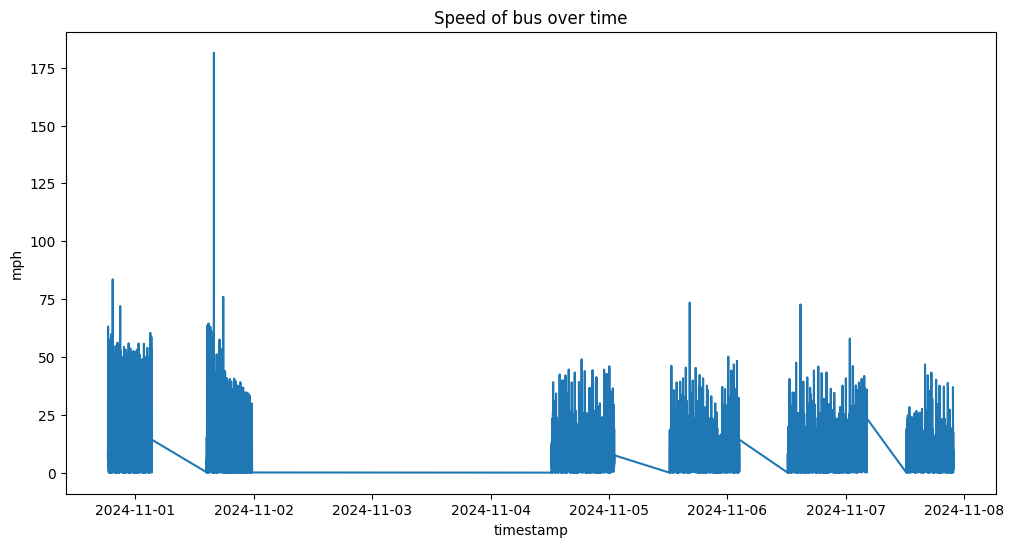

In [5]:
# convert the difference in longitude and latitude to miles per hour
# use difference in timestamp to calculate time
one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
one_bus_data['long_diff'] = one_bus_data['longitude'].diff()
one_bus_data['lat_miles'] = one_bus_data['lat_diff'] * 69
one_bus_data['long_miles'] = one_bus_data['long_diff'] * 53
one_bus_data['total_miles'] = (one_bus_data['lat_miles'] ** 2 + one_bus_data['long_miles'] ** 2) ** 0.5
one_bus_data['mph'] = one_bus_data['total_miles'] / one_bus_data['time_diff'] * 3600

# plot the speed of the bus over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='mph', data=one_bus_data)


plt.title('Speed of bus over time')
plt.show()

In [6]:
# calculate the change in load over time
one_bus_data['load_diff'] = one_bus_data['load'].diff()

C:\Users\akash\AppData\Local\Temp\ipykernel_11824\1176286829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['load_diff'] = one_bus_data['load'].diff()


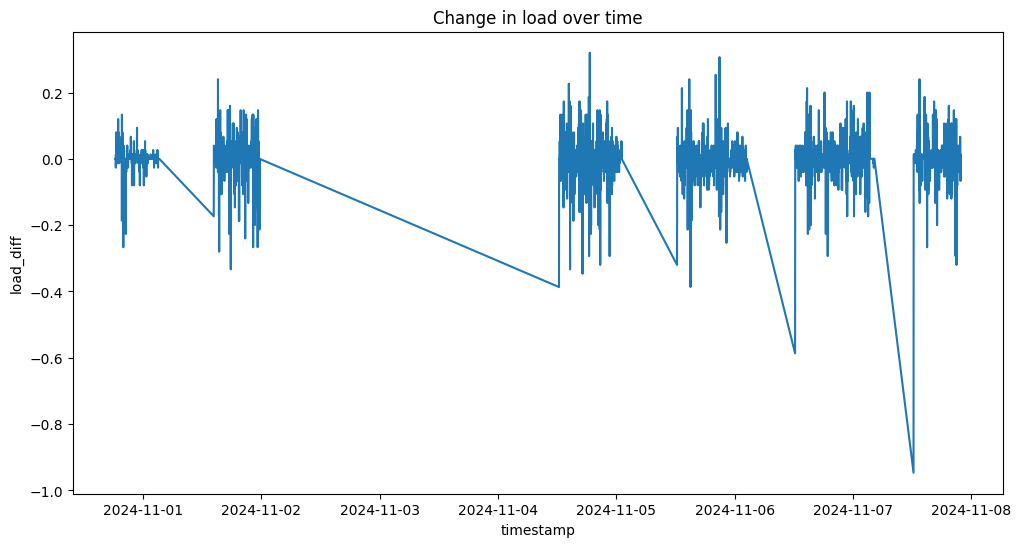

In [7]:
# plot the change in load over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='load_diff', data=one_bus_data)
plt.title('Change in load over time')
plt.show()

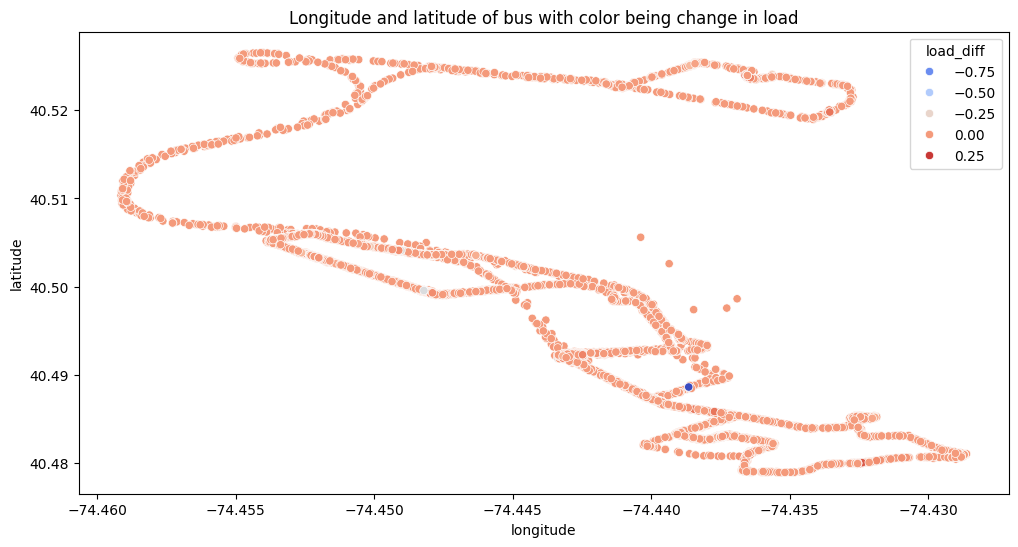

In [8]:
# plot longitude and latitude of bus with color being change in load
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='load_diff', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being change in load')
plt.show()

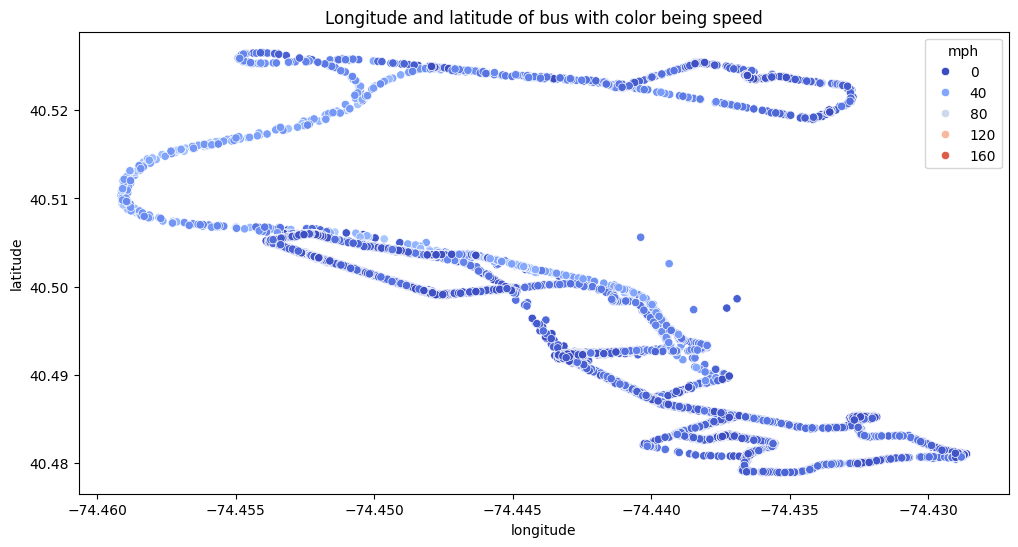

In [9]:
# graph all the places with 0 mph in color and everywhere else in black
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='mph', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being speed')
plt.show()

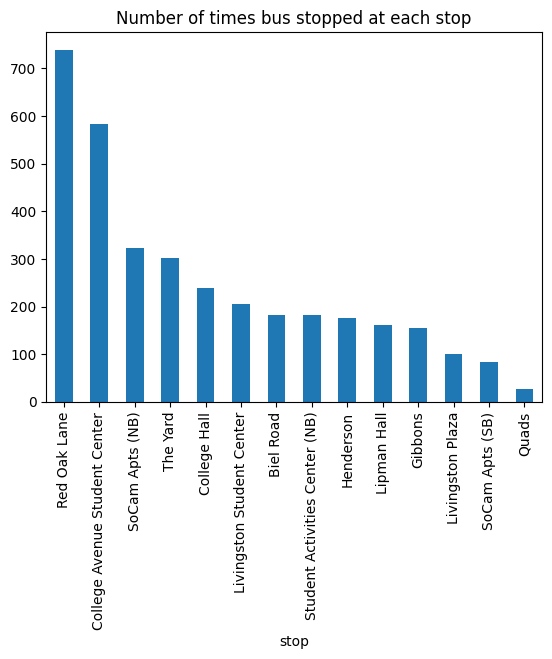

In [10]:
# make a bar graph of the stops
one_bus_data['stop'].value_counts().plot(kind='bar')
plt.title('Number of times bus stopped at each stop')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_11824\1207899318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1
C:\Users\akash\AppData\Local\Temp\ipykernel_11824\1207899318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5


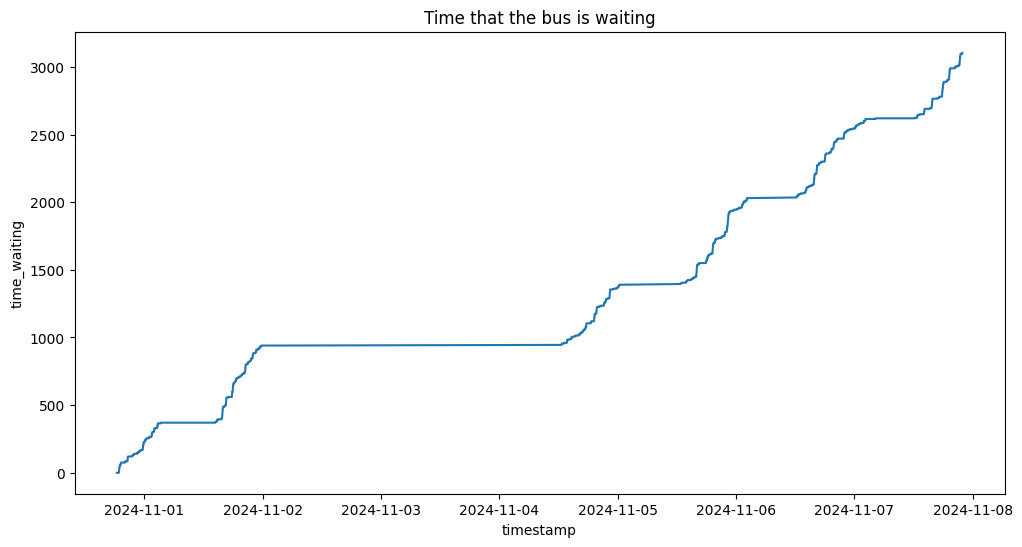

In [11]:
# get the time periods when the bus is not moving
one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1

# calculate the time that the bus is waiting
one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5

# plot the time that the bus is waiting
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='time_waiting', data=one_bus_data)
plt.title('Time that the bus is waiting')
plt.show()

In [12]:
# limit the data to when it is running one specific route
route = one_bus_data['routeName'].unique()[0]
one_bus_data = one_bus_data[one_bus_data['routeName'] == route]

C:\Users\akash\AppData\Local\Temp\ipykernel_11824\3518540220.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(limited['time_diff_stop'].dropna())


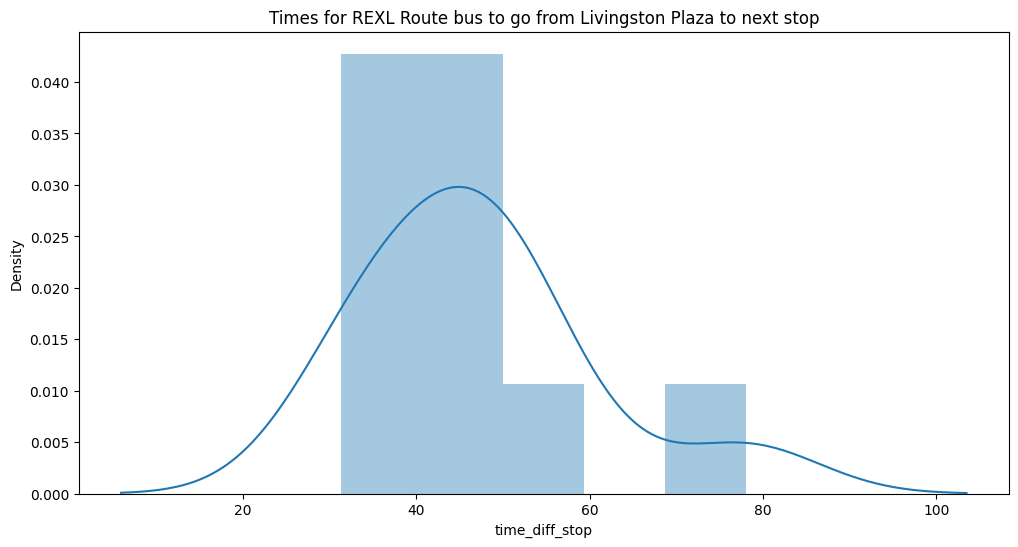

In [13]:
# measure the amount of time it takes for the bus to go from one stop to the next
stop = one_bus_data['stop'].unique()[0]

if type(stop) == float:
    stop = one_bus_data['stop'].unique()[1]

# make limited data which is each row of data where the bus is at the stop and went to another stop previously
# remove na stop rows
limited_total = one_bus_data.dropna(subset=['stop'])

# create new limited dataframe to add data to
limited = pd.DataFrame(columns=limited_total.columns)

en_route = False
for i in range(1, len(limited_total)):
    if limited_total.iloc[i]['stop'] == stop and en_route == True:
        limited = pd.concat([limited, limited_total.iloc[i].to_frame().T])
        en_route = False
    elif limited_total.iloc[i]['stop'] != stop:
        en_route = True


limited['time_diff_stop'] = limited['timestamp'].diff().dt.total_seconds() / 60

limited = limited[limited['time_diff_stop'] < 300]

# plot the distribution of the time it takes for the bus to go from one stop to the next
plt.figure(figsize=(12, 6))
sns.distplot(limited['time_diff_stop'].dropna())
plt.title(f'Times for {route} bus to go from {stop} to next stop')
plt.show()

In [14]:
limited

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,...,lat_diff,long_diff,lat_miles,long_miles,total_miles,mph,load_diff,not_moving,time_waiting,time_diff_stop
9333,7151,202,Transit Bus,48.160657,REXL Route,04:01 PM,-74.438631,40.525149,40,75,...,0.001311,0.001366,0.090493,0.072372,0.115874,13.90484,-0.066667,False,75,47.933333
14713,7151,202,Transit Bus,45.35927,REXL Route,04:57 PM,-74.438695,40.524974,3,75,...,0.001543,0.001552,0.106467,0.082256,0.134541,15.624112,0.0,False,120,56.183333
19279,7151,202,Transit Bus,46.009052,REXL Route,05:44 PM,-74.438627,40.525005,11,75,...,0.002312,0.002722,0.159514,0.14425,0.215065,24.975268,0.0,False,130,47.050000
23190,7151,202,Transit Bus,48.973854,REXL Route,06:24 PM,-74.438696,40.524969,1,75,...,0.001266,0.001342,0.087382,0.071105,0.112656,13.082664,0.0,False,140,39.933333
26865,7151,202,Transit Bus,104.036243,REXL Route,07:02 PM,-74.438677,40.525083,15,75,...,0.002533,0.002449,0.174743,0.129797,0.217675,26.120944,0.013333,False,165,38.416667
29900,7151,202,Transit Bus,46.906691,REXL Route,07:36 PM,-74.438858,40.524853,5,75,...,0.002117,0.001998,0.146094,0.105878,0.180426,20.952697,0.0,False,170,33.350000
33956,7151,202,Transit Bus,47.156413,REXL Route,08:25 PM,-74.438607,40.525073,6,75,...,0.001181,0.001235,0.081489,0.065476,0.104535,12.139562,-0.026667,False,250,49.250000
36173,7151,202,Transit Bus,33.192937,REXL Route,08:56 PM,-74.438534,40.525166,12,75,...,0.001845,0.003907,0.127284,0.207071,0.243063,28.226688,0.0,False,265,31.316667
39857,7151,202,Transit Bus,46.484351,REXL Route,10:14 PM,-74.439072,40.524615,15,75,...,0.00204,0.002047,0.140788,0.108465,0.177724,21.326838,0.0,False,330,78.100000
41780,7151,202,Transit Bus,45.147923,REXL Route,11:04 PM,-74.438613,40.52512,13,75,...,0.001291,0.001331,0.089079,0.070538,0.113625,13.195159,-0.026667,False,365,49.366667


In [16]:
# load stops json
stops = pd.read_json('data/stops.json')

len(stops)

26